<a href="https://colab.research.google.com/github/ChouhanUtkarsh/my-stock-project-data-engineering/blob/main/DataAnalyst_EduTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# ==========================================
# 1. LOAD DATASET
# ==========================================
# Load the student data file
df = pd.read_csv('Dataset.csv')

In [3]:
# ==========================================
# 2. DEFINE BUSINESS THRESHOLDS (From Pseudocode)
# ==========================================
MAX_INACTIVITY_DAYS = 7     # Rule 1
MIN_COMPLETION_RATE = 20    # Rule 2
MIN_PASSING_SCORE = 50      # Rule 2

In [4]:
# 2. Set Visual Style
sns.set(style="whitegrid")
plt.figure(figsize=(18, 10)) # Create a large canvas

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

Text(0.5, 0, 'Completion Rate (%)')

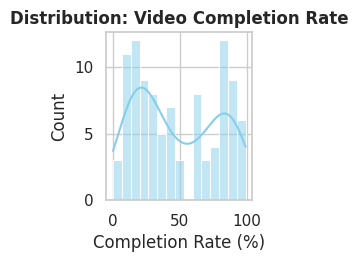

In [5]:
# --- Plot 1: Feature Distributions (Histograms) ---
# Purpose: Shows the spread of student performance
plt.subplot(2, 3, 1)
sns.histplot(df['Video_Completion_Rate'], bins=15, kde=True, color='skyblue')
plt.title('Distribution: Video Completion Rate', fontweight='bold')
plt.xlabel('Completion Rate (%)')

Text(0.5, 0, 'Average Score (%)')

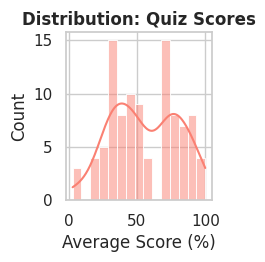

In [6]:
plt.subplot(2, 3, 2)
sns.histplot(df['Avg_Quiz_Score'], bins=15, kde=True, color='salmon')
plt.title('Distribution: Quiz Scores', fontweight='bold')
plt.xlabel('Average Score (%)')

Text(0.5, 1.0, 'Correlation Heatmap')

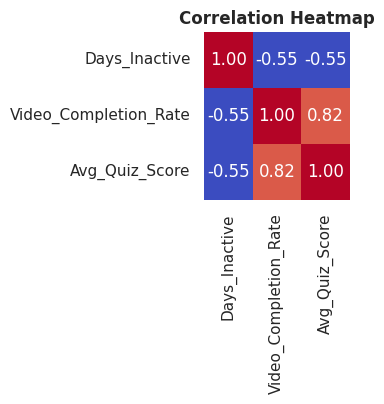

In [7]:
# --- Plot 2: Correlation Matrix (Heatmap) ---
# Purpose: Shows if Inactivity matches Low Scores
plt.subplot(2, 3, 3)
numeric_df = df.select_dtypes(include=['number']) # Select only numbers
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlation Heatmap', fontweight='bold')

/tmp/ipython-input-3251891595.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Risk_Segment', y='Days_Inactive', palette='Set2')


([0, 1, 2],
 [Text(0, 0, 'Healthy'),
  Text(1, 0, 'Medium Risk (Struggling)'),
  Text(2, 0, 'High Risk (Absent)')])

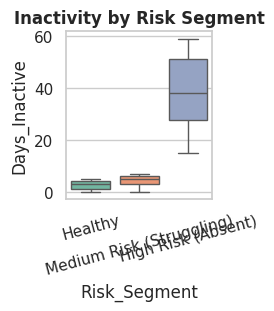

In [8]:
# --- Plot 3: Risk Analysis (Box Plots) ---
# Purpose: PROVES that your segments behave differently
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Risk_Segment', y='Days_Inactive', palette='Set2')
plt.title('Inactivity by Risk Segment', fontweight='bold')
plt.xticks(rotation=15)

/tmp/ipython-input-3364528375.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Risk_Segment', y='Avg_Quiz_Score', palette='Set2')


([0, 1, 2],
 [Text(0, 0, 'Healthy'),
  Text(1, 0, 'Medium Risk (Struggling)'),
  Text(2, 0, 'High Risk (Absent)')])

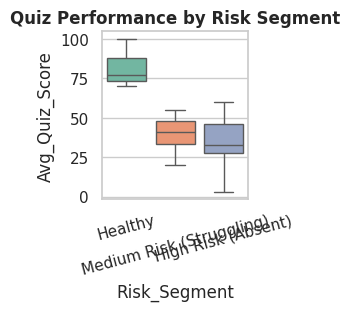

In [9]:
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='Risk_Segment', y='Avg_Quiz_Score', palette='Set2')
plt.title('Quiz Performance by Risk Segment', fontweight='bold')
plt.xticks(rotation=15)

/tmp/ipython-input-4062197904.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Course_Category', palette='viridis')


([0, 1, 2, 3],
 [Text(0, 0, 'Design'),
  Text(1, 0, 'Marketing'),
  Text(2, 0, 'Data Science'),
  Text(3, 0, 'Web Development')])

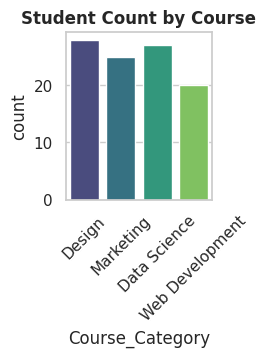

In [10]:
# --- Plot 4: Course Category Analysis ---
# Purpose: Shows which course is most popular
plt.subplot(2, 3, 6)
sns.countplot(data=df, x='Course_Category', palette='viridis')
plt.title('Student Count by Course', fontweight='bold')
plt.xticks(rotation=45)

In [11]:
# 3. Save and Show
plt.tight_layout()
plt.savefig('Exploratory_Data_Analysis.png', dpi=300)
plt.show()

<Figure size 640x480 with 0 Axes>

In [12]:
# ==========================================
# 3. APPLY ALGORITHMIC LOGIC
# ==========================================

In [13]:
def classify_student_risk(row):
    """
    Translates the Pseudocode logic into a Python Function.
    Input: A single row of student data.
    Output: Risk Status and Recommended Action.
    """

    # RULE 1: Check for "Ghost" Users (High Inactivity)
    if row['Days_Inactive'] > MAX_INACTIVITY_DAYS:
        return 'High Risk (Absent)'

    # RULE 2: Check for "Struggling" Users (Low Performance)
    # Logic: Active but failing to watch or pass
    elif (row['Video_Completion_Rate'] < MIN_COMPLETION_RATE) or (row['Avg_Quiz_Score'] < MIN_PASSING_SCORE):
        return 'Medium Risk (Struggling)'

    # RULE 3: Healthy Users
    else:
        return 'Low Risk (Healthy)'

# Apply the function to the entire dataset
df['Predicted_Risk'] = df.apply(classify_student_risk, axis=1)

In [14]:
# ==========================================
# 4. GENERATE INSIGHTS (The Result)
# ==========================================

In [15]:
risk_counts = df['Predicted_Risk'].value_counts()

print("--- ANALYSIS RESULT ---")
print(risk_counts)
print("\n--- INSIGHTS ---")
print(f"Total 'At Risk' Students Identified: {risk_counts['High Risk (Absent)'] + risk_counts['Medium Risk (Struggling)']}")
print(f"Percentage of Healthy Users: {(risk_counts['Low Risk (Healthy)'] / len(df)) * 100}%")

--- ANALYSIS RESULT ---
Predicted_Risk
Low Risk (Healthy)          46
Medium Risk (Struggling)    30
High Risk (Absent)          24
Name: count, dtype: int64

--- INSIGHTS ---
Total 'At Risk' Students Identified: 54
Percentage of Healthy Users: 46.0%


<Axes: xlabel='Days_Inactive', ylabel='Video_Completion_Rate'>

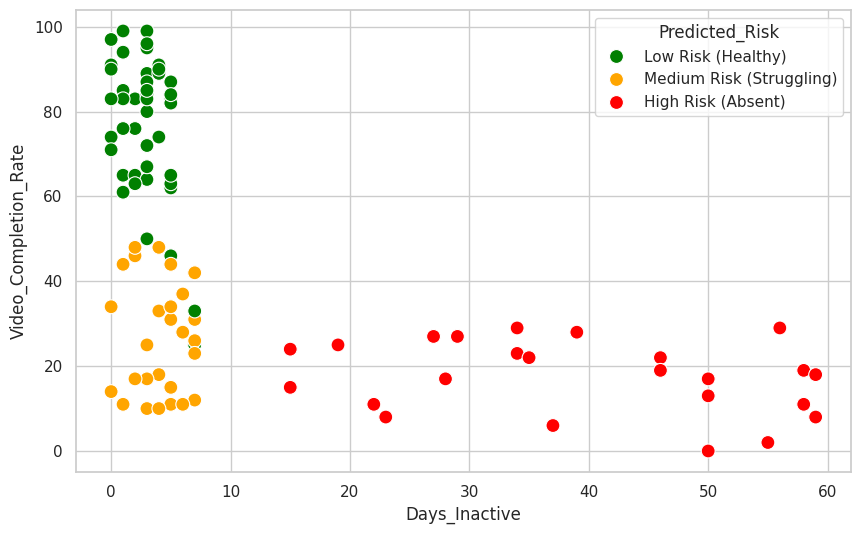

In [16]:
# ==========================================
# 5. VISUALIZE PROOF (For Slide)
# ==========================================
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Days_Inactive',
    y='Video_Completion_Rate',
    hue='Predicted_Risk',
    palette={'Low Risk (Healthy)': 'green', 'Medium Risk (Struggling)': 'orange', 'High Risk (Absent)': 'red'},
    s=100
)

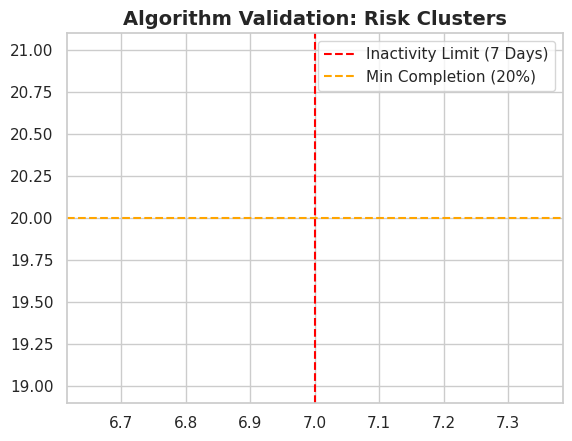

In [17]:
# Add Threshold Lines to prove logic works visually
plt.axvline(x=MAX_INACTIVITY_DAYS, color='red', linestyle='--', label=f'Inactivity Limit ({MAX_INACTIVITY_DAYS} Days)')
plt.axhline(y=MIN_COMPLETION_RATE, color='orange', linestyle='--', label=f'Min Completion ({MIN_COMPLETION_RATE}%)')

plt.title('Algorithm Validation: Risk Clusters', fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
plt.show()